In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils

np.random.seed(12)

## Data Importing

In [2]:
# Reads the image as an array
image_read = lambda file: cv2.imread(file, 0)

In [3]:
# filepaths for pictures:
path_test = '../data/asl_alphabet_test/'
path_train = '../data/asl_alphabet_train/'

### Creating the training set

In [ ]:
X_train = []
y_train = []

letters = os.listdir(path_train)

# Loops for making X_train and y_train
for letter in letters:
    path = path_train + letter + '/'
    pics = os.listdir(path)
        
    for pic in pics:
        img_path = path + pic
        image = image_read(img_path)
        image = image / 255
        X_train.append(image)
        y_train.append(letter)

In [ ]:
# Replacing the numbers with numeric values
y_train = [ord(x)%32-1 if x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' else x for x in y_train]

# replacing the workds with numeric values
subs = {'del' : 26, 'nothing' : 27, 'space': 28}

y_train = [subs.get(item, item) for item in y_train]

# Changing to categorical Values
y_train = utils.to_categorical(y_train, 29)

In [ ]:
X_train = np.array(X_train)

### Creating the test set

In [29]:
X_test = []
y_test = []

test_path = '../data/asl_alphabet_test/'

test_photos = os.listdir(test_path)

for photo in test_photos:
    path = test_path + photo
    image = image_read(path)
    image = image / 255
    X_test.append(image)
    y_test.append(photo[:-9])

In [30]:
# Replacing the numbers with numeric values
y_test = [ord(x)%32-1 if x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' else x for x in y_test]

# replacing the workds with numeric values
subs = {'del' : 26, 'nothing' : 27, 'space': 28}

y_test = [subs.get(item, item) for item in y_test]

# Changing to categorical Values
y_test = utils.to_categorical(y_test, 29)

In [41]:
X_test = np.array(X_test)

## CNN

In [49]:
X_train = X_train.reshape(X_train.shape[0], 200, 200, 1)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 1)

In [50]:
cnn_model = Sequential()

In [51]:
# Convolutional Layer
cnn_model.add(Conv2D(filters = 6,
                    kernel_size = (3, 3),
                    activation = 'relu',
                    input_shape = (200, 200, 1)))

In [52]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [53]:
cnn_model.add(Conv2D(16, 
                     kernel_size = (3,3),
                     activation = 'relu'))

In [54]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [55]:
cnn_model.add(Flatten())

In [56]:
cnn_model.add(Dense(128, activation = 'relu'))

cnn_model.add(Dense(29, activation = 'softmax'))

In [57]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [69]:
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        epochs=7,
                        verbose=1)

Train on 87000 samples, validate on 28 samples
Epoch 1/7
87000/87000 [==============================] - 695s 8ms/sample - loss: 0.1030 - acc: 0.9729 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 2/7
87000/87000 [==============================] - 669s 8ms/sample - loss: 0.0665 - acc: 0.9831 - val_loss: 0.0228 - val_acc: 1.0000
Epoch 3/7
87000/87000 [==============================] - 710s 8ms/sample - loss: 0.0510 - acc: 0.9863 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 4/7
87000/87000 [==============================] - 707s 8ms/sample - loss: 0.0419 - acc: 0.9884 - val_loss: 0.0499 - val_acc: 0.9643
Epoch 5/7
87000/87000 [==============================] - 701s 8ms/sample - loss: 0.0355 - acc: 0.9899 - val_loss: 0.0394 - val_acc: 1.0000
Epoch 6/7
87000/87000 [==============================] - 709s 8ms/sample - loss: 0.0236 - acc: 0.9939 - val_loss: 0.0312 - val_acc: 1.0000
Epoch 7/7
87000/87000 [==============================] - 773s 9ms/sample - loss: 0.0318 - acc: 0.9907 - val_loss: 0.001

#### Saving CNN Model

In [70]:
cnn_model.save('model1.h5')

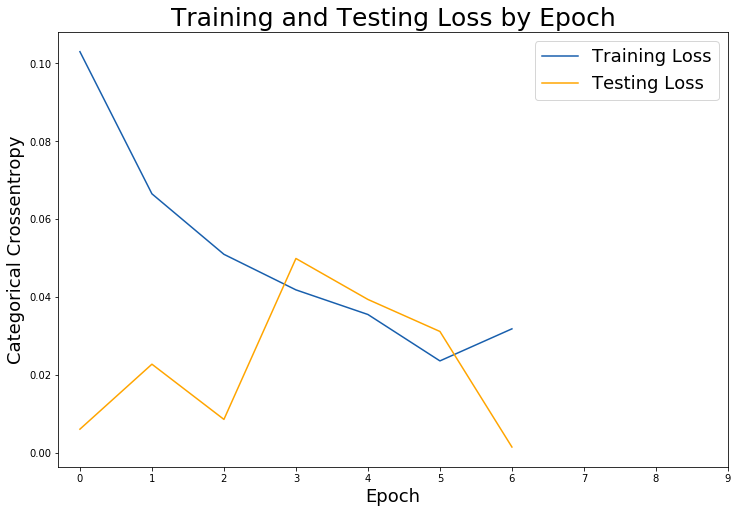

In [71]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);